In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd /g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore

/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore


In [3]:
import sys
import os
import re
from pprint import pprint
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from ESMF_profiling import _read_ryaml, _expt_fullname, list_esmf_files, _extract_ntasks_values, _extract_restart_stop_values, build_ESMF_trees, region_time_consumption, collect_runtime_tot
from matplotlib import pyplot as plt

In [4]:
pics_folder = "esmf-profiling"
pics_folder = os.path.join(tool_dir, pics_folder)
os.makedirs(pics_folder, exist_ok=True)

In [12]:
expts_manager_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager'
yaml_input = os.path.join(expts_manager_path, 'Expts_manager-025deg-scaling_performance.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
test_rel_path = yaml_input['test_path']
esmf_expt_dir1 = yaml_input['namelists']['cross_block1']['cross_block1_dirs']
esmf_expt_dirs = list(esmf_expt_dir1)
MOM_full_paths = [os.path.join(expts_manager_path, test_rel_path, esmf_expt_dir) for esmf_expt_dir in  esmf_expt_dirs]
xxx = '000'
ESMF_path = [f"{MOM_full_path}/archive/output{xxx}" for MOM_full_path in MOM_full_paths]
ncpus_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['PELAYOUT_attributes_combo']
expt_names1 = _expt_fullname(ncpus_list_combo1)
clock1_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['CLOCK_attributes_combo']
clock1 = _expt_fullname(clock1_list_combo1)
pprint(ESMF_path)
pprint(expt_names1)
pprint(clock1)

['/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_1_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_2_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_3_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_4_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_5_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_6_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_7_test/archive/output000',
 '/g/data/tm70/ml0072/COMMO

In [6]:
date_values = _extract_restart_stop_values(clock1)

In [7]:
task_values = _extract_ntasks_values(expt_names1)
task_values

[{'atm_ntasks': 48,
  'cpl_ntasks': 96,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 96,
  'ice_ntasks': 240,
  'ocn_ntasks': 1200,
  'ocn_rootpe': 240,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 288,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 240,
  'ice_ntasks': 240,
  'ocn_ntasks': 1200,
  'ocn_rootpe': 240,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 192,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48

In [8]:
varnames = [
    '[ESMF]',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ATM] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ROF] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ICE] IPDv01p3',

]

In [9]:
%%time
start_prefix='ESMF_Profile'
# ESMF_Profile.xxx    : (0. count, 1. total, 2. self_time, 3. mean    , 4. min_time, 5. max_time           )
# ESMF_Profile.summary: (0. count, 1. PETs , 2. mean     , 3. min_time, 4. max_time, 5. min_PET, 6. max_PET)
esmf_summary = True
index = 2
runtime_tot = collect_runtime_tot(ESMF_path, varnames=varnames, start_prefix=start_prefix, esmf_summary=esmf_summary, index=index)

CPU times: user 36.3 ms, sys: 4.64 ms, total: 41 ms
Wall time: 47.3 ms


In [10]:
runtime_tot[-1][varnames[5]]

[202.967]

In [11]:
runtime_tot[-2][varnames[5]]

[210.324]

In [13]:
expt_names1[0]

'atm_ntasks_48_cpl_ntasks_96_ice_ntasks_288_ocn_ntasks_1152_ocn_rootpe_288_rof_ntasks_48'

Text(0, 0.5, 'time_consumption (seconds)')

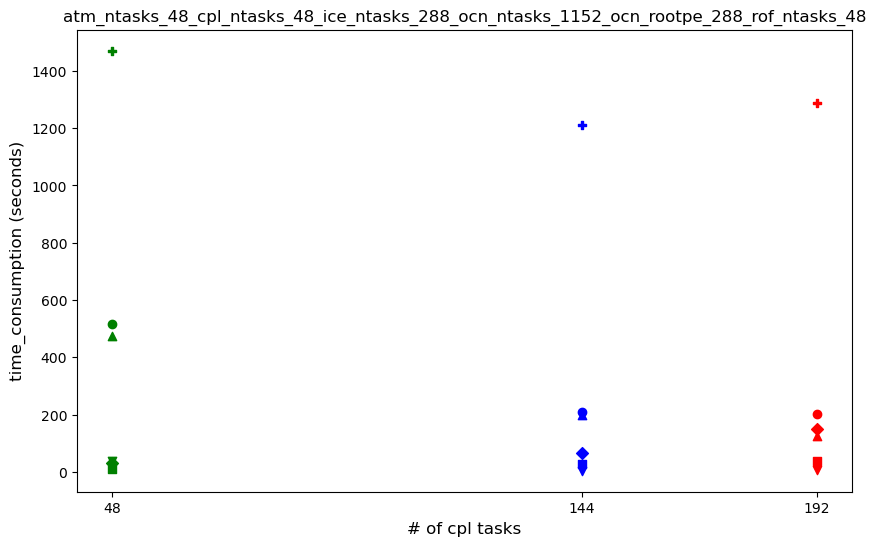

In [91]:
label_fontsize = 12
legend_fontsize = 9
nrows=1
ncols=1
figsize=(10,6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]
color = ['r', 'b', 'g']
select_index = [-1, -2, -3]
cpl_ntasks = [task_values[i]['cpl_ntasks'] for i in select_index]
for j_index, i in enumerate(select_index):
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[0]], marker='P',
                    label=f"ESMF - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[5]], marker='o',
                    label=f"MED-TO-OCN - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[6]], marker='s',
                    label=f"OCN-TO-MED - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[7]], marker='^',
                    label=f"MED-TO-ICE - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[8]], marker='v',
                    label=f"ICE-TO-MED - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][varnames[11]], marker='D',
                    label=f"MED - cpl_ntasks: {task_values[i]['cpl_ntasks']}",
                    facecolors=color[j_index], edgecolors=color[j_index])
    #axes[0].legend(loc='best', fontsize=legend_fontsize)
    axes[0].set_title(f"{expt_names1[i]}")


axes[0].set_xticks(cpl_ntasks)
axes[0].set_xlabel('# of cpl tasks', fontsize=label_fontsize)
axes[0].set_ylabel('time_consumption (seconds)', fontsize=label_fontsize)

In [19]:
runtime_tot

[{'[ESMF]': [253.9227],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [181.9414],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1': [24.8077],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1': [0.8874],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1': [0.0753],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1': [8.4949],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1': [12.1366],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1': [35.124],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1': [0.2653],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1': [1.1118],
  '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF-TO-MED] RunPhase1': [0.0695],
  '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)': [30.5014],
  '[ESMF]/[ensemble] Init 1